## Stock Market Forecasting

Investment firms, hedge funds and even individuals have been using financial models to better understand market behavior and make profitable investments and trades. A wealth of information is available in the form of historical stock prices and company performance data, suitable for machine learning algorithms to process.

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We are going to do time series analysis and forecasting for stock market.

In [3]:
df1 = pd.read_csv('Apple.csv')
df2= pd.read_csv('amazon.csv')
df3 = pd.read_csv("ADANIPORTS.csv")
stock=df2
stock_1 = df3

In [4]:
stock.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,89.5625,79.046799,81.5000,89.3750,16117600,89.3750
1,2000-01-04,91.5000,81.750000,85.3750,81.9375,17487400,81.9375
2,2000-01-05,75.1250,68.000000,70.5000,69.7500,38457400,69.7500
3,2000-01-06,72.6875,64.000000,71.3125,65.5625,18752000,65.5625
4,2000-01-07,70.5000,66.187500,67.0000,69.5625,10505400,69.5625


In [5]:
stock_1.head()
stock_1.drop(["Symbol","Series","Prev Close","Last","Turnover","Trades","Deliverable Volume","%Deliverble"],axis = 1)

,Date,Open,High,Low,Close,VWAP,Volume
0,2007-11-27,770.00,1050.00,770.00,962.90,984.72,27294366
1,2007-11-28,984.00,990.00,874.00,893.90,941.38,4581338
2,2007-11-29,909.00,914.75,841.00,884.20,888.09,5124121
3,2007-11-30,890.00,958.00,890.00,921.55,929.17,4609762
4,2007-12-03,939.75,995.00,922.00,969.30,965.65,2977470
...,...,...,...,...,...,...,...
3215,2020-11-23,375.85,379.35,370.30,375.15,374.66,4065424
3216,2020-11-24,378.00,402.00,376.00,392.25,395.17,19485370
3217,2020-11-25,396.30,404.70,384.40,398.95,395.90,18238080
3218,2020-11-26,400.80,413.00,395.65,410.15,404.31,12856261


In [6]:
stock['Date'].min()

'2000-01-03'

In [7]:
stock_1['Date'].min()

'2007-11-27'

In [8]:
stock['Date'].max()

'2019-02-15'

In [9]:
stock_1['Date'].max()

'2020-11-27'

In [10]:
stock_1["Date"]

0       2007-11-27
1       2007-11-28
2       2007-11-29
3       2007-11-30
4       2007-12-03
           ...    
3215    2020-11-23
3216    2020-11-24
3217    2020-11-25
3218    2020-11-26
3219    2020-11-27
Name: Date, Length: 3220, dtype: object

In [11]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')
stock.Date

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
4806    2019-02-11
4807    2019-02-12
4808    2019-02-13
4809    2019-02-14
4810    2019-02-15
Name: Date, Length: 4811, dtype: object

In [12]:
stock_1.Date = pd.to_datetime(stock_1.Date, format='%Y%m%d', errors='ignore')
stock_1.Date

0       2007-11-27
1       2007-11-28
2       2007-11-29
3       2007-11-30
4       2007-12-03
           ...    
3215    2020-11-23
3216    2020-11-24
3217    2020-11-25
3218    2020-11-26
3219    2020-11-27
Name: Date, Length: 3220, dtype: object

## Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [13]:
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')

In [14]:
cols = ['High', 'Low', 'Open', 'Volume', 'VWAP']
stock_1.drop(cols, axis=1, inplace=True)
stock_1 = stock_1.sort_values('Date')

In [15]:
stock.isnull().sum()

Date     0
Close    0
dtype: int64

In [16]:
stock = stock.groupby('Date')['Close'].sum().reset_index()

In [17]:
stock.head()

,Date,Close
0,2000-01-03,89.3750
1,2000-01-04,81.9375
2,2000-01-05,69.7500
3,2000-01-06,65.5625
4,2000-01-07,69.5625


In [18]:
stock_1.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Last                    0
Close                   0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [19]:
stock_1 = stock_1.groupby('Date')['Close'].sum().reset_index()

In [20]:
stock_1.head()

,Date,Close
0,2007-11-27,962.90
1,2007-11-28,893.90
2,2007-11-29,884.20
3,2007-11-30,921.55
4,2007-12-03,969.30


## Indexing with time series data

In [21]:
stock = stock.set_index('Date')
stock.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15'],
      dtype='object', name='Date', length=4811)

In [22]:
stock_1 = stock_1.set_index('Date')
stock_1.index

Index(['2007-11-27', '2007-11-28', '2007-11-29', '2007-11-30', '2007-12-03',
       '2007-12-04', '2007-12-05', '2007-12-06', '2007-12-07', '2007-12-10',
       ...
       '2020-11-14', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
       '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27'],
      dtype='object', name='Date', length=3220)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [23]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock_1.Close.resample('M').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [24]:
stock_1.index = pd.to_datetime(stock_1.index)

monthly_mean = stock_1.Close.resample('M').mean()

Have a quick peek 2017 sales data.

In [27]:
x = monthly_mean['2018':]
x.mean()

364.8902839630132

## Visualizing Close time series data

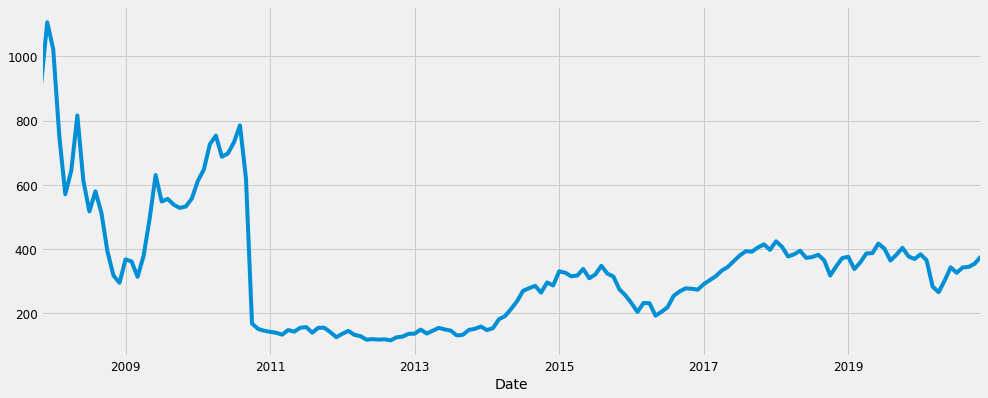

In [28]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

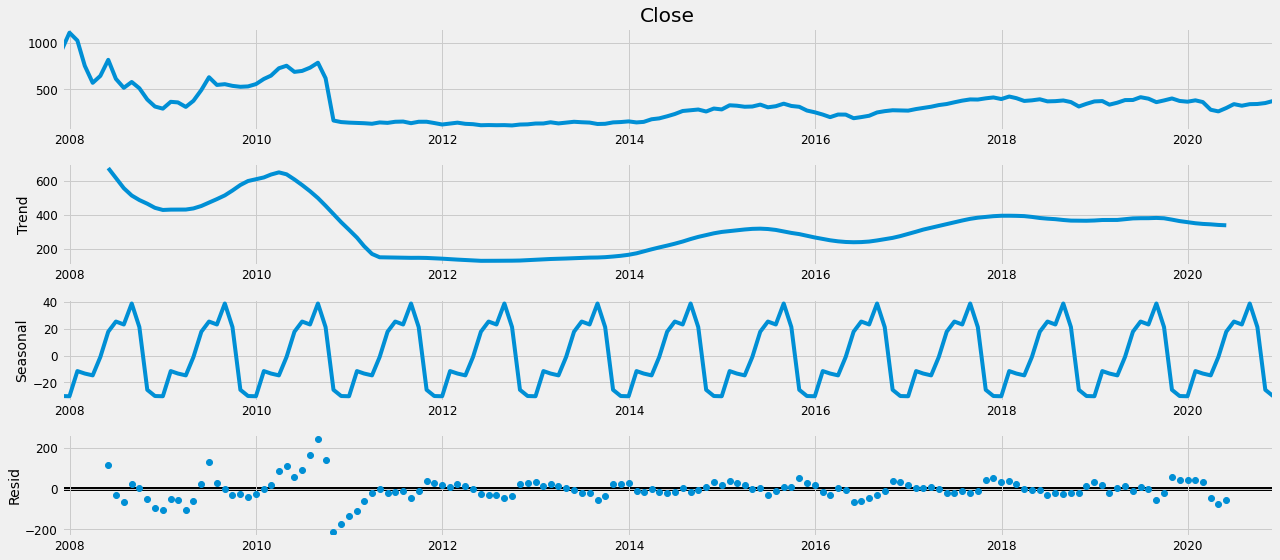

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the Close price is unstable, along with its obvious seasonality.

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model. ARIMA models are denoted with the notation `ARIMA(p, d, q)`. These three parameters account for seasonality, trend, and noise in data:`

In [30]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2299.7300227922537
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1986.8304557155998
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1943.851676207281
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1736.414477417017
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1928.3740171253353
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1900.011792714638
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1742.6714351435849
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1710.8900369192556
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2084.2064228492854
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1807.8820986551245
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1756.6683168812374
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1575.9999725564046
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1769.7581074495474
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1726.3760089136285
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1599.8076301393546
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1573.6005726852459
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1716.4058546632364
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1525.685724673

In [33]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [34]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3853      0.057      6.809      0.000       0.274       0.496
ar.S.L12      -0.1597      0.061     -2.599      0.009      -0.280      -0.039
ma.S.L12      -0.7527      0.121     -6.210      0.000      -0.990      -0.515
sigma2      2492.2922    280.521      8.885      0.000    1942.480    3042.104


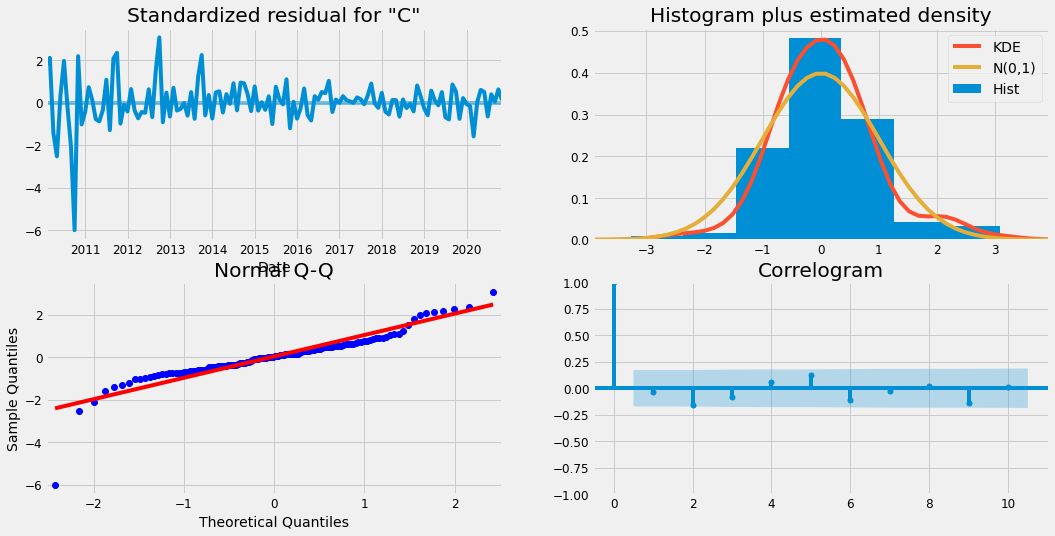

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted Close to real close price of the time series, and we set forecasts to start at `2017-12-31` to the end of the data.

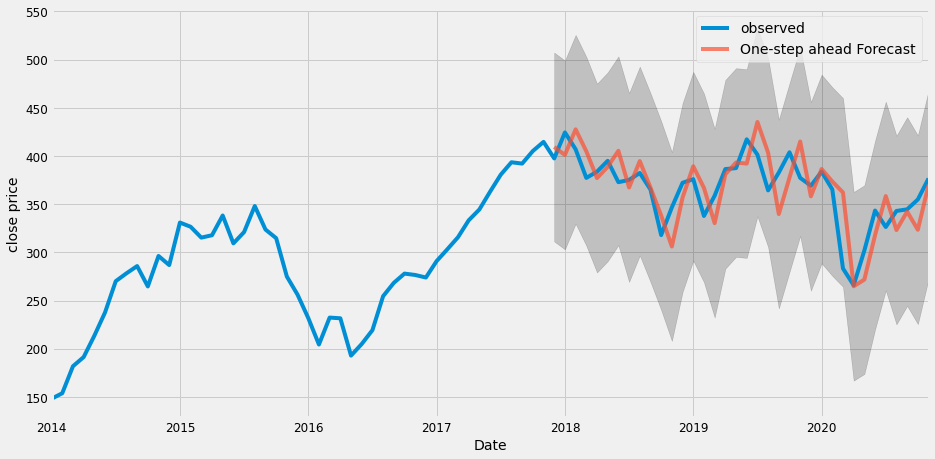

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [37]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 699.15


In [38]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 26.44


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion... of the real close price.

## Producing and visualizing forecasts

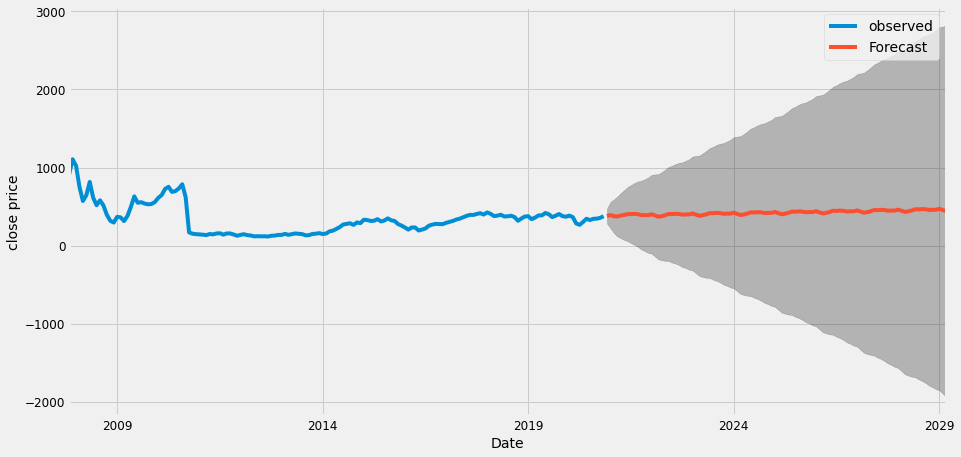

In [109]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()

Our model clearly captured close price seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.